In [1]:
# Import the Pandas library
import pandas as pd 
# Read in the raw temperature and emissions datasets (they are in CSV format) 
raw_t = pd.read_csv('../resources/GLB.Ts+dSST.csv', skiprows=1)
raw_e = pd.read_csv('../resources/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_41048.csv', skiprows=3)

In [2]:
#INvestigate the data 
raw_t.head()

,1880,-0.3,-0.18,-0.12,-0.2,-0.12.1,-0.24,-0.22,-0.1,-0.17,-0.24.1,-0.2.1,-0.23,-0.19,***,***.1,-0.15,-0.18.1,-0.2.2
0,1881,-0.16,-0.18,0.03,0.03,0.01,-0.21,-0.07,-0.03,-0.14,-0.21,-0.22,-0.11,-0.11,-0.12,-0.19,0.03,-0.1,-0.19
1,1882,0.13,0.14,0.03,-0.19,-0.17,-0.27,-0.21,-0.06,-0.11,-0.25,-0.17,-0.25,-0.11,-0.1,0.05,-0.11,-0.18,-0.18
2,1883,-0.32,-0.39,-0.13,-0.18,-0.21,-0.13,-0.09,-0.16,-0.21,-0.14,-0.23,-0.16,-0.2,-0.2,-0.32,-0.17,-0.13,-0.2
3,1884,-0.16,-0.09,-0.38,-0.43,-0.37,-0.41,-0.35,-0.27,-0.28,-0.25,-0.31,-0.29,-0.3,-0.29,-0.14,-0.39,-0.35,-0.28
4,1885,-0.59,-0.30,-0.26,-0.43,-0.42,-0.45,-0.36,-0.32,-0.24,-0.2,-0.2,-0.06,-0.32,-0.34,-0.40,-0.37,-0.38,-0.21


In [3]:
raw_e.head()

,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835335649402,0.0822037967470503,0.210531477092341,0.202737303453956,0.213560349319029,0.205890925853079,...,1.24409153765549,1.25268084136928,1.33021856719297,1.25377616969393,1.29030677595566,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.578574,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,6.122595,5.867410,5.916884,5.901775,5.832906,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.645736,0.687465,0.763574,0.878238,1.003053,1.170540,...,4.636813,4.559462,4.837780,4.674925,4.886988,NaN,NaN,NaN,NaN,NaN
3,United Arab Emirates,ARE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.119035,0.109141,0.163533,0.175833,0.132825,0.146820,...,18.808520,18.491617,19.294920,18.559236,22.939606,NaN,NaN,NaN,NaN,NaN
4,Argentina,ARG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2.383343,2.458551,2.538446,2.330685,2.553442,2.656466,...,4.607164,4.644373,4.609180,4.498540,4.781508,NaN,NaN,NaN,NaN,NaN


In [4]:
# Create new dataframe with an index for each month
# First create the date range
date_rng = pd.date_range(start='1/1/1880', end='1/03/2019', freq='M')

type(date_rng[0])

### returns 
### pandas._libs.tslibs.timestamps.Timestamp

# Next create the empty DataFrame, which we will populate using the actual data
t = pd.DataFrame(date_rng, columns=['date'])

# Create a column for the anomoly values
t['Avg_Anomaly_deg_C'] = None


# Set the index of the DataFrame to the date column (DateTime index)
t.set_index('date', inplace=True)

# Show the first few elements
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,None
1880-02-29,None
1880-03-31,None
1880-04-30,None
1880-05-31,None


In [5]:
raw_t = raw_t.iloc[:,:13]
raw_t.head()


,1880,-0.3,-0.18,-0.12,-0.2,-0.12.1,-0.24,-0.22,-0.1,-0.17,-0.24.1,-0.2.1,-0.23
0,1881,-0.16,-0.18,0.03,0.03,0.01,-0.21,-0.07,-0.03,-0.14,-0.21,-0.22,-0.11
1,1882,0.13,0.14,0.03,-0.19,-0.17,-0.27,-0.21,-0.06,-0.11,-0.25,-0.17,-0.25
2,1883,-0.32,-0.39,-0.13,-0.18,-0.21,-0.13,-0.09,-0.16,-0.21,-0.14,-0.23,-0.16
3,1884,-0.16,-0.09,-0.38,-0.43,-0.37,-0.41,-0.35,-0.27,-0.28,-0.25,-0.31,-0.29
4,1885,-0.59,-0.30,-0.26,-0.43,-0.42,-0.45,-0.36,-0.32,-0.24,-0.2,-0.2,-0.06


In [6]:
# Import relevant libraries
import calendar
from datetime import datetime

# Function definition
def populate_df_with_anomolies_from_row(row):
    year = row['Year']
    #year = row[0]
    # Anomaly values (they seem to be a mixture of strings and floats)
    monthly_anomolies = row.iloc[1:]
    # Abbreviated month names (index names)
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
        # Get the last day for each month 
        last_day = calendar.monthrange(year,datetime.strptime(month, '%b').month)[1]
        # construct the index with which we can reference our new DataFrame (to populate) 
        date_index = datetime.strptime(f'{year} {month} {last_day}', '%Y %b %d')
        # Populate / set value @ above index, to anomaly value
        t.loc[date_index] = monthly_anomolies[month]
        # Apply function to each row of raw data 
_ = raw_t.apply(lambda row: populate_df_with_anomolies_from_row(row), axis=1)

# Show the first few elements of our newly populated DataFrame
t.head()


KeyError: ('Year', 'occurred at index 0')

In [7]:
#-You may have noticed that the anomaly values seem to be a bit messy, 
#they are a mixture of strings and floats — 
#with a few unusable ‘***’ values mixed in (2019). Let's clean them up
# Import Numpy, a library meant for large arrays - we will use it for its NaN representation 
import numpy as np

# Define function to convert values to floats, and return a 'NaN = Not a Number' if this is not possible
def clean_anomaly_value(raw_value):
    try:
        return float(raw_value)
    except:
        return np.NaN
    
# Apply above function to all anomaly values in DataFrame
t['Avg_Anomaly_deg_C'] = t['Avg_Anomaly_deg_C'].apply(lambda raw_value: clean_anomaly_value(raw_value))

# 'Forward fill' to take care of NaN values
t.fillna(method='ffill', inplace=True)

# Show the first few elements of our newly cleaned DataFrame
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,NaN
1880-02-29,NaN
1880-03-31,NaN
1880-04-30,NaN
1880-05-31,NaN


In [8]:
# Plot the data - quick and easy - using matplotlib, we will draw prettier graphs later

# Import Matplotlib
import matplotlib.pyplot as plt

# Allow for rendering within notebook
%matplotlib inline

# Create figure, title and plot data
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.title("Global surface temperature anamolies since 1880")
plt.plot(t, color='#1C7C54', linewidth=1.0)
plt.show()


ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [9]:
#-Let’s downsample our temperature data into years, the string ‘A’ represents ‘calendar year-end’. 
t.resample('A').mean().head()

,Avg_Anomaly_deg_C
date,
1880-12-31,NaN
1881-12-31,NaN
1882-12-31,NaN
1883-12-31,NaN
1884-12-31,NaN


In [10]:
# Now lets visualize our resampled DataFrame

# Create figure, title and plot resampled data
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.title("Global surface temperature anamolies since 1880")
plt.plot(t.resample('A').mean(), color='#1C7C54', linewidth=1.0)
plt.show()

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [11]:
#From our DataFrame, we will use only the row representing the CO₂
#emissions for the entire world. Like before, 
#we will create a new DataFrame that uses a DateTime index — 
#and then use the raw data to populate it
# Define function to pull value from raw data, using DateIndex from new DataFrame row

def populate_df(row):
    index = str(row['date'].year)
    value = raw_e_world.loc[index]
    return value
  
# Select just the co2 emissions for the 'world', and the columns for the years 1960-2018 
raw_e_world = raw_e[raw_e['Country Name']=='World'].loc[:,'1960':'2018']
#raw_e_world = raw_e[raw_e['Country Name']=='Iran'].loc[:,'1960':'2018']

# 'Traspose' the resulting slice, making the columns become rows and vice versa
raw_e_world = raw_e_world.T
raw_e_world.columns = ['value']

# Create a new DataFrame with a daterange the same the range for.. 
# the Temperature data (after resampling to years)
date_rng = pd.date_range(start='31/12/1960', end='31/12/2018', freq='y')
e = pd.DataFrame(date_rng, columns=['date'])

# Populate the new DataFrame using the values from the raw data slice
v = e.apply(lambda row: populate_df(row), axis=1)
e['Global CO2 Emissions per Capita'] = v
e.set_index('date', inplace=True)
e


KeyError: 'Country Name'

In [12]:
#DateTime indexes make for convenient slicing of data, let’s select all of our data after the year 2001:
#global_co2=
e[e.index.year>2011]

NameError: name 'e' is not defined

In [13]:
#There seems to be a few NaN’s towards the end of our data — lets use Panda’s fillna method to deal with this
e.fillna(method='ffill', inplace=True)
e[e.index.year>2011]

NameError: name 'e' is not defined

In [14]:
e['1984-01-04':'1990-01-06']

NameError: name 'e' is not defined

In [15]:
#Let's plot our temperature data again using Matplotlib,  — adding axis labels and titles, etc.
# import Matplotlib
import matplotlib.pyplot as plt
# Allow for graphs to be displayed in Jupyter notebook
%matplotlib inline

# Resample or temperature data to years (end-of-year)
t_resampled = t.resample('A').mean()

# Create figures and axes
fig, ax = plt.subplots(figsize=(10,8))

# Plot temperature data with specific colour and line thickness
ax.plot(t_resampled, color='#1C7C54', linewidth=2.5)

# Set axis labels and graph title
ax.set(xlabel='Time (years)', ylabel='Temperature Anomaly (deg. Celsius)',
       title='Global Temperature Anomalies')

# Enable grid
ax.grid()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002101ABCD2F0> (for post_execute):


ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

NameError: name 'e' is not defined

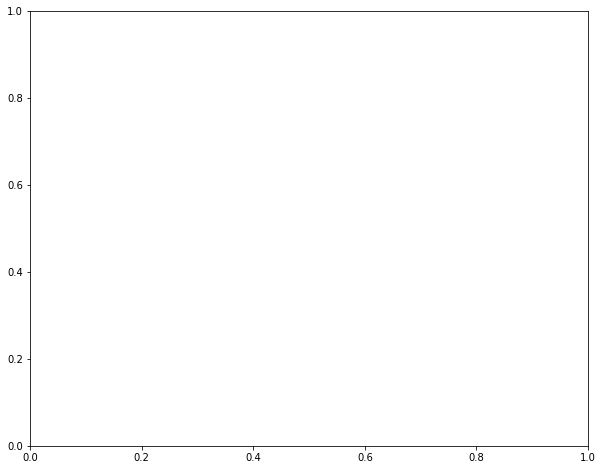

In [16]:
# Create figures and axes
fig, ax = plt.subplots(figsize=(10,8))

# Plot co2 emissions data with specific colour and line thickness
ax.plot(e, color='#3393FF', linewidth=2.5)

# Set axis labels and graph title
ax.set(xlabel='Time (years)', ylabel='Emissions (Metric Tons per Capita)',
       title='Global CO2 Emission over Time')

# Enable grid
ax.grid()

In [17]:
#The Plotly Python package is an open-source library built on plotly.js — which is in turn built on d3.js.
#In this tutorial, we will be using a wrapper called cufflinks — this makes it easy to use Plotly with Pandas DataFrames.
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [18]:
#et’s plot both datasets again, this time using Plotly and Cufflinks:
t.resample('A').mean().iplot(kind='line', xTitle='Time (years)', color='#1C7C54',
                  yTitle='Temperature Anomaly (deg. Celsius)', title='Global Temperature Anomalies')



In [19]:
#Plotting temperature data using Plotly
e.iplot(kind='line', xTitle='Time (years)', color='#3393FF',
                  yTitle='Emissions (Metric Tons per Capita)', title='Global CO2 Emission over Time')

NameError: name 'e' is not defined

In [20]:
#Prohecy
# Import Facebook's Prophet forecasting library
from fbprophet import Prophet

# Create a new DataFrame with which we will create/train our Prophet model 
t_prophet = pd.DataFrame()
t_prophet['ds'] = t.index
t_prophet['y'] = t['Avg_Anomaly_deg_C'].values

# Instantiate model and fit to data (just like with sklearn model API)
m = Prophet()
m.fit(t_prophet)

# Generate future dataframe containing predictions (we are doing this for 100 years into the future)
future = m.make_future_dataframe(freq='m', periods=100*12)
forecast = m.predict(future)

# Plot the resulting forecast
m.plot(forecast)

ModuleNotFoundError: No module named 'fbprophet'

In [21]:
#Prohecy
# Import Facebook's Prophet forecasting library
from fbprophet import Prophet

# Create a new DataFrame with which we will create/train our Prophet model 
t_prophet = pd.DataFrame()
t_prophet['ds'] = t.index
t_prophet['y'] = t['Avg_Anomaly_deg_C'].values

# Instantiate model and fit to data (just like with sklearn model API)
m = Prophet()
m.fit(t_prophet)

# Generate future dataframe containing predictions (we are doing this for 100 years into the future)
future = m.make_future_dataframe(freq='m', periods=100*12)
forecast = m.predict(future)

# Plot the resulting forecast
m.plot(forecast)

ModuleNotFoundError: No module named 'fbprophet'